Datasets - Image Classification

IMPORT RESOURCES

In [14]:
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader

In [3]:
directory = r"C:\Users\yashk\OneDrive\Documents\Projects\Datasets"

train_df = torchvision.datasets.FashionMNIST(
    root = directory,
    train = True,
    download = True
)

test_df = torchvision.datasets.FashionMNIST(
    root = directory,
    train = False,
    download = True
)

100%|██████████| 26.4M/26.4M [01:09<00:00, 379kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 150kB/s]
100%|██████████| 4.42M/4.42M [00:10<00:00, 429kB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.6MB/s]


In [10]:
import gzip
import numpy as np

def read_images_from_ubyte(file_path):
    with gzip.open(file_path, 'rb') as f:
        # Skip the 16-byte header
        f.read(16)
        
        # Read the rest of the bytes
        buf = f.read()
        # Convert the bytes to a NumPy array of 8-bit integers
        data = np.frombuffer(buf, dtype=np.uint8)
        
        # Reshape the data into a 2D array (e.g., 60000 images, each 784 pixels)
        images = data.reshape(60000, 28 * 28)
        return images

In [12]:
import pandas as pd
import os
import gzip
import numpy as np

def read_images_from_ubyte(file_path):
    with gzip.open(file_path, 'rb') as f:
        # Skip the 16-byte header
        f.read(16)
        
        # Read the rest of the bytes
        buf = f.read()
        # Convert the bytes to a NumPy array of 8-bit integers
        data = np.frombuffer(buf, dtype=np.uint8)
        
        # Reshape the data into a 2D array (e.g., 60000 images, each 28*28 pixels)
        images = data.reshape(60000, 28 * 28)
        return images

def read_labels_from_ubyte(file_path):
    with gzip.open(file_path, 'rb') as f:
        # Skip the 8-byte header
        f.read(8)
        # Read the rest of the bytes and convert to a NumPy array
        buf = f.read()
        labels = np.frombuffer(buf, dtype=np.uint8)
        return labels

# Define the root directory where the data is stored
root_directory = r"C:\Users\yashk\OneDrive\Documents\Projects\Datasets"
data_subdirectory = "FashionMNIST/raw"
data_path = os.path.join(root_directory, data_subdirectory)

# Construct the full file paths
image_file = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
label_file = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

images = read_images_from_ubyte(image_file)
labels = read_labels_from_ubyte(label_file)

# Create a DataFrame from the image data
df = pd.DataFrame(images)

# Add the 'label' column
df['label'] = labels

# Save the DataFrame to a CSV file
df.to_csv('fashion_mnist_train.csv', index=False)

print("Data successfully converted and saved to fashion_mnist_train.csv")

Data successfully converted and saved to fashion_mnist_train.csv


In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


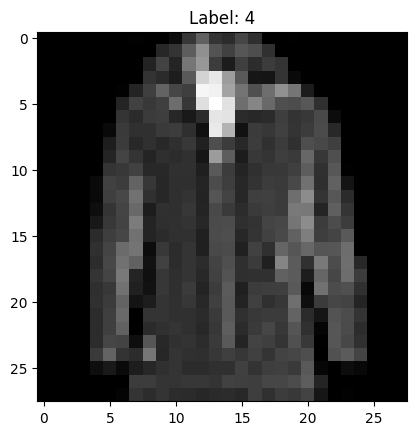

In [20]:
image_data = df.iloc[19, :-1].values
image_array = image_data.reshape(28, 28)
img = Image.fromarray(image_array.astype('uint8'), 'L')
plt.imshow(img, cmap='gray')
label = df.iloc[19, -1]
plt.title(f'Label: {label}')
plt.show()